In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('wind turbine life time.xlsx')

In [3]:
start_date = np.zeros(df.shape[0])
end_date = np.zeros(df.shape[0])

for i in range(1977,2017):
    years = list(df[i])
    none_zeros = []
    for index,j in enumerate(years):
        if j > 0:
            none_zeros.append(index)
    for num in none_zeros:
        if start_date[num] == 0:
            start_date[num] = i
            
for i in range(2016,1976,-1):
    years = list(df[i])
    none_zeros = []
    for index,j in enumerate(years):
        if j > 0:
            none_zeros.append(index)
    for num in none_zeros:
        if end_date[num] == 0:
            end_date[num] = i
len(start_date),len(end_date)       

(3306, 3306)

In [4]:
df['Year of start'] = list(start_date)
df['Year of end'] = list(end_date)
df.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,1977,1978,1979,1980,1981,...,2009,2010,2011,2012,2013,2014,2015,2016,Year of start,Year of end
0,10.0,13.0,18.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9,1989.0,2016.0
2,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9,1989.0,2016.0
3,90.0,18.0,23.0,1.427740e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,91831.0,93290.0,98739.0,37100.0,0.0,NaN,NaN,NaN,1998.0,2012.0
4,22.0,10.0,18.0,2.504650e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986.0,2002.0


In [5]:
# Get date of start and end to calculate life time
df_data = df[['Capacity (kW)','Rotor diameter (m)','Hub height (m)','Year of start','Year of end']]
df_data.head()    

,Capacity (kW),Rotor diameter (m),Hub height (m),Year of start,Year of end
0,10.0,13.0,18.0,0.0,0.0
1,300.0,35.0,35.0,1989.0,2016.0
2,300.0,35.0,35.0,1989.0,2016.0
3,90.0,18.0,23.0,1998.0,2012.0
4,22.0,10.0,18.0,1986.0,2002.0


In [6]:
df_data = df_data.dropna()
drop_list = []
for i in df_data.index:
    if df_data.loc[i][0] < 1 or df_data.loc[i][1] < 5 or df_data.loc[i][2] < 5 or df_data.loc[i][3] == 0 or df_data.loc[i][4] == 0:
        drop_list.append(i)
len(drop_list)

401

In [7]:
df_data = df_data.drop(index=drop_list)
df_data['Life time'] = df_data['Year of end']-df_data['Year of start']+1
df_data['bias'] = np.ravel(np.ones((df_data.shape[0],1))) # adding bias
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),Year of start,Year of end,Life time,bias
1,300.0,35.0,35.0,1989.0,2016.0,28.0,1.0
2,300.0,35.0,35.0,1989.0,2016.0,28.0,1.0
3,90.0,18.0,23.0,1998.0,2012.0,15.0,1.0
4,22.0,10.0,18.0,1986.0,2002.0,17.0,1.0
5,75.0,17.0,23.0,1986.0,2002.0,17.0,1.0


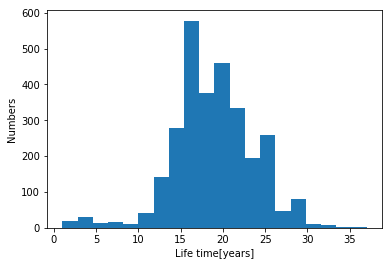

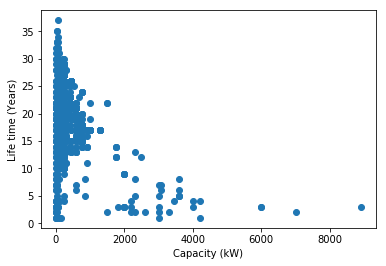

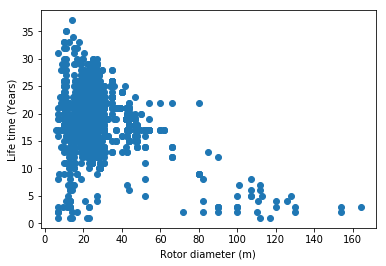

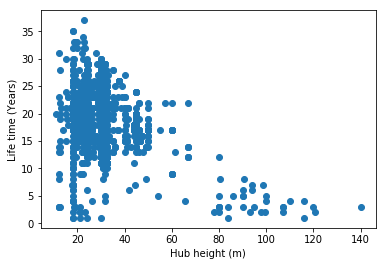

In [9]:
# a general plot to see the distribution of life time
life_time = list(df_data['Life time'])

plt.hist(life_time,20)
plt.xlabel('Life time[years]')
plt.ylabel('Numbers')

plt.show()

plt.scatter(df_data['Capacity (kW)'],df_data['Life time'])
plt.xlabel('Capacity (kW)')
plt.ylabel('Life time (Years)')
plt.show()

plt.scatter(df_data['Rotor diameter (m)'],df_data['Life time'])
plt.xlabel('Rotor diameter (m)')
plt.ylabel('Life time (Years)')
plt.show()

plt.scatter(df_data['Hub height (m)'],df_data['Life time'])
plt.xlabel('Hub height (m)')
plt.ylabel('Life time (Years)')
plt.show()


In [10]:
df_data['Life time'].mean(),df_data['Life time'].median()

(18.831955922865014, 18.0)

In [11]:
# By using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
X = df_data.values.copy()
y = X[:,5]
x = X[:,[0,1,2]]
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [13]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

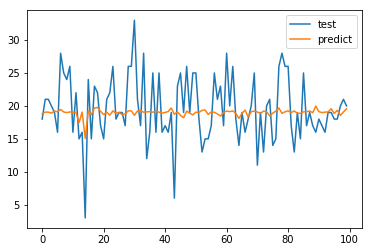

Text(0, 0.5, 'predict')

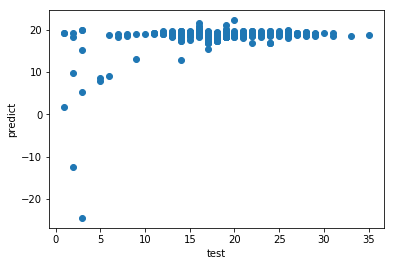

In [14]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [15]:
from sklearn import metrics
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

3.5914604730090063 22.495701521117507 4.742963369151981


In [16]:
y_20 = np.ones((len(y_test)))*20
metrics.mean_absolute_error(y_test,y_20),np.sqrt(metrics.mean_squared_error(y_test,y_20))

(3.855371900826446, 4.981923245961356)

In [17]:
regr.score(x_train, y_train),regr.score(x_test, y_test),regr.coef_

(0.09484491550269325,
 0.05436645765029813,
 array([-0.00669743,  0.12498331, -0.02307329]))

In [18]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve

In [19]:
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')

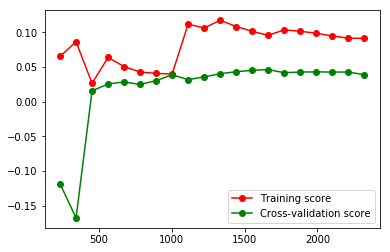

In [20]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [21]:
# adding more features by PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

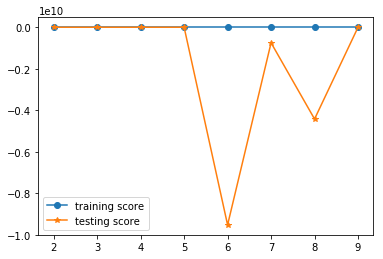

In [22]:
X = df_data.values.copy()
x_p = X[:,[0,1,2,3]]
y_lt = X[:,[5]]
train_scores = []
test_scores = []
for i in range(2,10):
    poly = PolynomialFeatures(i)
    x_prime = poly.fit_transform(x_p)
    x_train, x_test, y_train, y_test = train_test_split(x_prime,y_lt)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    train_scores.append(regr.score(x_train,y_train))
    test_scores.append(regr.score(x_test,y_test))
    
plt.plot(range(2,10),train_scores,'o-',label = 'training score')
plt.plot(range(2,10),test_scores,'*-',label = 'testing score')
plt.legend()
plt.show() 

In [23]:
train_scores,test_scores

([0.2929222120202011,
  0.27919365328074186,
  0.3852488408022568,
  -0.17346655443100856,
  0.3079587731890646,
  0.42614154271456506,
  0.42385811654231587,
  0.4027864400392103],
 [0.3219245833854789,
  0.24401388548661862,
  -0.3351604128043444,
  -1274.2149276507794,
  -9529421096.915407,
  -749718427.3765446,
  -4424581442.452819,
  -969366.8734218758])

0.300254865907318 0.3038997921878297


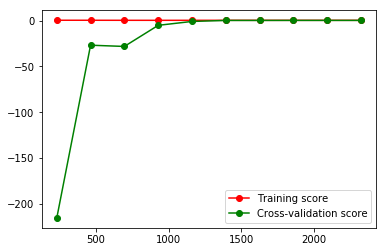

In [24]:
X = df_data.values.copy()
x_p = X[:,[0,1,2,3]]
y_r = X[:,[5]]
poly = PolynomialFeatures(2)
x_prime = poly.fit_transform(x_p)
x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
regr = LinearRegression()
regr.fit(x_train,y_train)
print(regr.score(x_train, y_train),regr.score(x_test, y_test))

train_sizes, train_scores, valid_scores = learning_curve(regr, x_prime, y_r, train_sizes=np.linspace(0.1, 1.0, 10),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

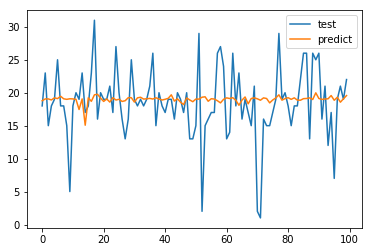

Text(0, 0.5, 'predict')

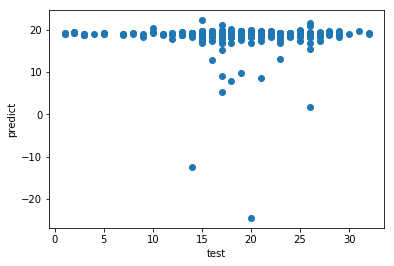

In [25]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [26]:
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

3.726625544443478 28.656328893730205 5.353160645238494


In [27]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor


parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, np.ravel(y_train))
y_pred_RF = RF_model.predict(x_test)

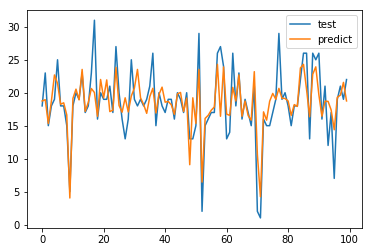

Text(0, 0.5, 'predict')

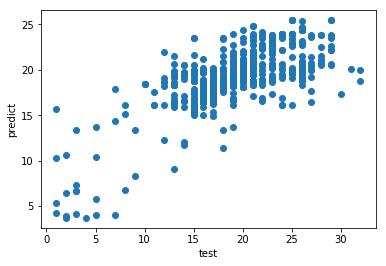

In [28]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [33]:
y_ = [round(i) for i in y_pred_RF]


In [34]:
MAE_RF=metrics.mean_absolute_error(y_test,y_) 
MSE_RF=metrics.mean_squared_error(y_test,y_)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_))
print(MAE_RF,MSE_RF,RMSE_RF)

2.2231404958677685 11.046831955922865 3.3236774747142457


In [35]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.5572168729927627, 0.522242368747635)

In [36]:

y_pred = RF_model.predict(x_prime)
len(y_pred)

2904

In [37]:
y_pred.max(),y_pred.min(),y_pred.mean(),np.median(y_pred)

(25.55818307170315, 3.718084554347318, 18.877480403783576, 18.805906649388856)

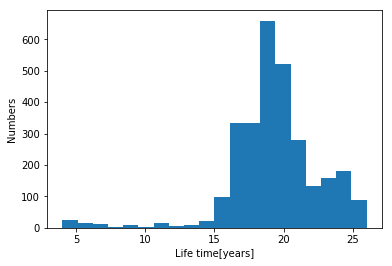

In [38]:
y_2 = [int(i)+1 for i in y_pred]
plt.hist(y_2,20)
plt.xlabel('Life time[years]')
plt.ylabel('Numbers')
plt.show()

In [39]:
max(y_2),min(y_2),np.mean(y_2),np.median(y_2)

(26, 4, 19.386707988980717, 19.0)

In [40]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=200, gamma=0.01, epsilon=.01)

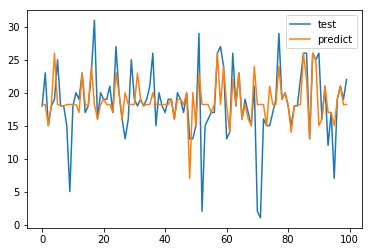

Text(0, 0.5, 'predict')

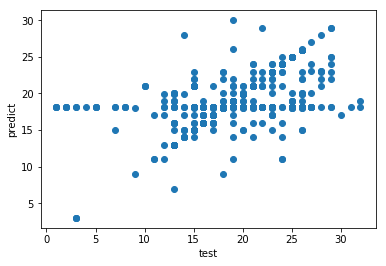

In [41]:
svr_rbf.fit(x_train,np.ravel(y_train))
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [42]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

2.2805034993333178 17.314154099582574 4.161028009949293


In [43]:
y_20 = np.ones((len(y_test)))*20
MAE_20=metrics.mean_absolute_error(y_test,y_20) 
MSE_20=metrics.mean_squared_error(y_test,y_20)  
RMSE_20= np.sqrt(metrics.mean_squared_error(y_test,y_20))
print(MAE_20,MSE_20,RMSE_20)

3.7327823691460056 24.553719008264462 4.955170936331506


In [44]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.7237034448217194, 0.2438782726622889)

In [49]:
# feature extraction, adding new features

df_data['P_sqrt'] = df_data['Capacity (kW)']**0.5
df_data['1/P'] = 1/df_data['Capacity (kW)']
df_data['P_log'] = np.log(list(df_data['Capacity (kW)']))
df_data['R_sqrt'] = df_data['Rotor diameter (m)']**0.5
df_data['1/R'] = 1/df_data['Rotor diameter (m)']
df_data['R_log'] = np.log(list(df_data['Rotor diameter (m)']))
df_data['R/h'] = df_data['Rotor diameter (m)']/df_data['Hub height (m)']
df_data['1000/Start'] = 1000/df_data['Year of start']
df_data['exp(R/h)'] = np.exp(df_data['R/h'])
#df_data['P_square'] = df_data['Capacity (kW)']**2
df_data = df_data.dropna()
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),Year of start,Year of end,Life time,bias,P_sqrt,1/P,P_log,R_sqrt,1/R,R_log,R/h,1000/Start,exp(R/h)
1,300.0,35.0,35.0,1989.0,2016.0,28.0,1.0,17.320508,0.003333,5.703782,5.916080,0.028571,3.555348,1.000000,0.502765,2.718282
2,300.0,35.0,35.0,1989.0,2016.0,28.0,1.0,17.320508,0.003333,5.703782,5.916080,0.028571,3.555348,1.000000,0.502765,2.718282
3,90.0,18.0,23.0,1998.0,2012.0,15.0,1.0,9.486833,0.011111,4.499810,4.242641,0.055556,2.890372,0.782609,0.500501,2.187170
4,22.0,10.0,18.0,1986.0,2002.0,17.0,1.0,4.690416,0.045455,3.091042,3.162278,0.100000,2.302585,0.555556,0.503525,1.742909
5,75.0,17.0,23.0,1986.0,2002.0,17.0,1.0,8.660254,0.013333,4.317488,4.123106,0.058824,2.833213,0.739130,0.503525,2.094114


In [40]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
X = df_data.values.copy()
y = X[:,5]
x = X[:,[0,1,2,3,6,7,8,9,10,11,12,13,14,15]]
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

[0.04087652 0.02440166 0.10169664 0.19356298 0.         0.0608152
 0.04275662 0.06430148 0.04257719 0.0414037  0.0616556  0.06373405
 0.20501866 0.0571997 ]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
from sklearn.feature_selection import RFE
model=LinearRegression() # LinearRegression Model as Estimator

#model = RandomForestRegressor()
rfe=RFE(model,4)# using 4 features

fit=rfe.fit(x,y)
print( "Feature Ranking(liner): %s" % (fit.ranking_))

Feature Ranking(liner): [10  7  8  5 11  9  1  6  2  1  1  3  1  4]


In [44]:
X = df_data.values.copy()
y = X[:,5]
x = X[:,[2,3,8,11,12,14]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

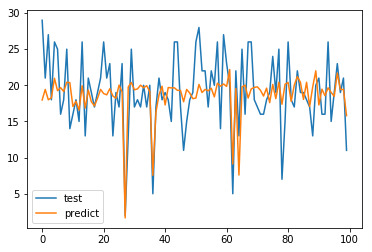

Text(0, 0.5, 'predict')

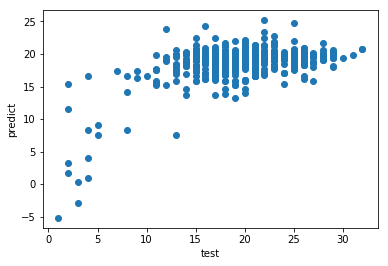

In [45]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [46]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

3.275697697647232 16.79233184479456 4.097844780466259


In [47]:
regr.score(x_train,y_train),regr.score(x_test,y_test)

(0.29372620002517813, 0.20302243911130735)

In [48]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

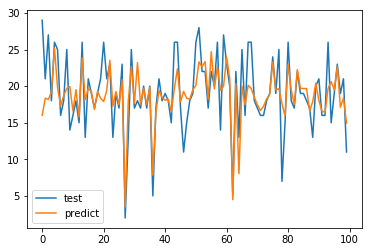

Text(0, 0.5, 'predict')

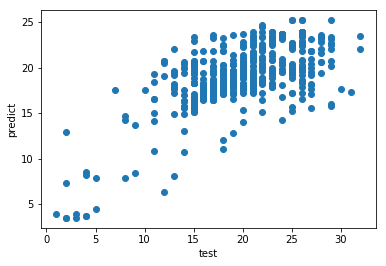

In [49]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [50]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

2.3292145821914296 11.605698667412188 3.4067137636455733


In [51]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.5590756475303912, 0.4491842168286738)

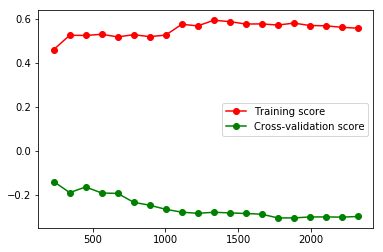

In [52]:
train_sizes, train_scores, valid_scores = learning_curve(RF_model, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, -test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [53]:
train_scores_mean

array([0.46083947, 0.52610188, 0.52518961, 0.53055324, 0.51869463,
       0.52864718, 0.51983467, 0.52698878, 0.57592383, 0.56869964,
       0.594341  , 0.58809403, 0.5771517 , 0.57772712, 0.57235382,
       0.58135556, 0.57043317, 0.56907653, 0.56216331, 0.55821592])

In [54]:
-test_scores_mean

array([-0.13833256, -0.18876504, -0.16310515, -0.19056894, -0.19238167,
       -0.23289182, -0.24610322, -0.26467106, -0.27763547, -0.28283559,
       -0.27811024, -0.28088896, -0.28364429, -0.28687623, -0.30372035,
       -0.30362286, -0.29944353, -0.29919805, -0.30015864, -0.29720305])

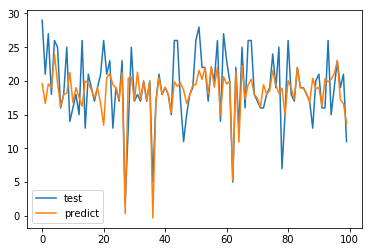

Text(0, 0.5, 'predict')

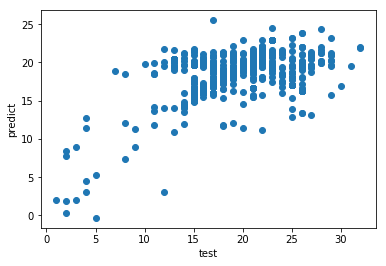

In [55]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=.01)
svr_rbf.fit(x_train,np.ravel(y_train))
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [56]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

2.526465260356902 15.296004437888604 3.911010667064027


(0.34902297224479184, 0.27403934004376995)